# **🔬 Predicting Cardiac Ailments Using Machine Learning**
![ECG_Signal](ecg.jpg)
## **🩺 Introduction**
Cardiovascular diseases are one of the leading causes of death worldwide, and early diagnosis is crucial for preventing severe complications. In this project, we will develop a **machine learning model** to classify different types of cardiac ailments based on **ECG (Electrocardiogram) signals**. Our dataset contains **1200 ECG records**, each belonging to one of **four categories of heart conditions**. The goal is to analyze the ECG features and build a predictive model that can accurately classify a patient’s condition.  

---

## **📊 Understanding ECG Signals**
An **Electrocardiogram (ECG)** is a medical test that records the electrical activity of the heart over time. It provides essential information about the **heart rate, rhythm, and electrical conduction system**, helping doctors diagnose cardiac diseases.  

In our dataset, ECG signals have been processed using the **MODWPT (Maximal Overlap Discrete Wavelet Packet Transform)** method, extracting **54 key features** that reflect different characteristics of the heart’s electrical activity.

---

## **🦠 Categories of Cardiac Ailments**
Our dataset includes four major categories of heart conditions, which we aim to classify:

| **Disease** | **Description** |
|------------|----------------|
| **Arrhythmia (ARR)** | Irregular heartbeats that can be too fast, too slow, or erratic. |
| **Atrial Fibrillation & Flutter (AFF)** | Rapid and irregular electrical activity in the atria, leading to uncoordinated contractions. |
| **Congestive Heart Failure (CHF)** | A condition where the heart cannot pump blood efficiently, causing fluid buildup in the lungs and body. |
| **Normal Sinus Rhythm (NSR)** | A normal heart rhythm with a regular rate and electrical activity. |

Each record in our dataset is labeled as **ARR, AFF, CHF, or NSR**, allowing us to develop a **multi-class classification model**.

---

## **📑 Understanding the Dataset**
The dataset consists of **56 columns**:
- **Column 1** → Record ID
- **Columns 2-55** → Features extracted from ECG signals using MODWPT.
- **Column 56** → **Target label** (ARR, AFF, CHF, NSR).

Certain features play a significant role in identifying specific heart conditions:

| **Condition** | **Key Features** |
|--------------|----------------|
| **Arrhythmia (ARR)** | Heartbeats per minute (hbpermin), RR intervals |
| **Atrial Fibrillation (AFF)** | P-wave absence, RR interval irregularity |
| **Congestive Heart Failure (CHF)** | QRS duration, T-wave changes, variability in RR intervals |
| **Normal Sinus Rhythm (NSR)** | Regular heart rate, normal QRS and P-wave patterns |

In the next steps, we will conduct **Exploratory Data Analysis (EDA)**, **data preprocessing**, and build a **classification model** to predict cardiac ailments using the extracted ECG features.

🚀 **Let’s begin our journey into predictive cardiology!** 💙


In [261]:
# import  libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


In [262]:
#read data and creat a dataframe
df = pd.read_csv('ECGCvdata.csv')
df.head(5)

RECORD   hbpermin      Pseg     PQseg    QRSseg     QRseg     QTseg  \
0       1  74.925669  0.076508  0.108889  0.088254  0.043571  0.193016   
1       2  68.503469  0.072483  0.096181  0.093924  0.046267  0.193490   
2       3  83.488603  0.071154  0.086610  0.039530  0.018590  0.132479   
3       4  68.503469  0.082812  0.108160  0.090365  0.045226  0.188802   
4       5  82.080000  0.070760  0.102632  0.101023  0.049415  0.193713   

      RSseg     STseg      Tseg  ...       RMSSD    QRSarea    QRSperi  \
0  0.044683  0.104762  0.130476  ...  292.296636  18.457618  63.615239   
1  0.047656  0.099566  0.089149  ...  318.563915  23.043230  67.787773   
2  0.020940  0.092949  0.094444  ...  273.165412  10.756353  29.253827   
3  0.045139  0.098437  0.088281  ...  313.046941  23.845086  65.228737   
4  0.051608  0.092690  0.085965  ...  263.225676  20.942791  72.830353   

    PQslope   QRslope   RSslope   STslope  NN50      pNN50  ECG_signal  
0 -0.014364  0.075270 -0.070846  0.012606     2   5.882353         ARR  
1 -0.021207  0.083773 -0.077458  0.016175     1   3.225806         ARR  
2 -0.042542       NaN       NaN  0.027131    16  42.105263         ARR  
3 -0.017806  0.091591 -0.088559  0.017022     2   6.451613         ARR  
4 -0.016650  0.064547 -0.062246  0.016191     2   5.405405         ARR  

[5 rows x 56 columns]

# Exploratory Data Analysis (EDA) 

 **🎯 Goals:**  
- Understand the structure of the dataset.  
- Check for missing values and decide how to handle them.  
- Analyze the distribution of features and class labels.  
- Detect skewness and outliers.  
- Identify correlations between features.  
- Decide feature engineering steps (e.g., normalization, feature selection).  


## Understand The Structure Of The Dataset

In [263]:
df.info()
# all data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [264]:
df.shape

(1200, 56)

In [265]:
df.describe()

RECORD     hbpermin         Pseg        PQseg       QRSseg  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean    600.500000    81.893980     0.060902     0.078099     0.048238   
std     346.554469    19.324351     0.009453     0.019897     0.034649   
min       1.000000    12.857143     0.021556     0.044526     0.000000   
25%     300.750000    67.563000     0.053943     0.060344     0.015101   
50%     600.500000    79.872000     0.060642     0.075184     0.044692   
75%     900.250000    96.000000     0.066849     0.095190     0.083032   
max    1200.000000   160.500000     0.095317     0.145577     0.120160   

             QRseg        QTseg        RSseg        STseg         Tseg  ...  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  ...   
mean      0.024437     0.141541     0.023800     0.093303     0.102714  ...   
std       0.017501     0.029225     0.017175     0.013332     0.022594  ...   
min       0.000000     0.098761     0.000000     0.052338     0.034936  ...   
25%       0.007804     0.116016     0.007143     0.089423     0.090046  ...   
50%       0.022676     0.137019     0.021965     0.097825     0.099210  ...   
75%       0.041915     0.166314     0.041097     0.101200     0.112408  ...   
max       0.065278     0.211111     0.058333     0.138444     0.198413  ...   

              SDSD        RMSSD      QRSarea      QRSperi      PQslope  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     42.484060   199.417894     7.675047    23.915846    -0.071647   
std     105.722123   112.292014     8.452832    25.070324     0.049705   
min       0.800624    61.711281     0.000000     0.000000    -0.219938   
25%       4.060951   123.147741     0.000000     0.124186    -0.106660   
50%      11.265829   183.603851     5.228299    19.904060    -0.058518   
75%      44.785825   248.101035    14.355389    46.194325    -0.027685   
max    1725.927603  1478.488460    33.131007    86.577082    -0.005427   

          QRslope     RSslope      STslope         NN50        pNN50  
count  432.000000  431.000000  1200.000000  1200.000000  1200.000000  
mean     0.141737   -0.150496     0.041659     6.442500     8.112425  
std      0.073086    0.077532     0.026456     7.748445    10.325033  
min      0.028660   -0.315525     0.008183     0.000000     0.000000  
25%      0.082613   -0.240304     0.023853     1.000000     0.613497  
50%      0.108418   -0.116241     0.034460     3.000000     3.680982  
75%      0.229659   -0.087565     0.049778    10.000000    12.883436  
max      0.270786   -0.027983     0.164633    37.000000    52.727273  

[8 rows x 55 columns]

In [266]:
# drop unneccessary columns
df= df.drop(columns=[df.columns[0]])

## Check For Missing Values  



In [267]:
# check for missing values and the percentage of missing values
missing_percentage = df.isna().sum()*100/len(df)
missing_percentage = missing_percentage[missing_percentage>0]
missing_percentage

QRtoQSdur    64.083333
RStoQSdur    64.083333
PonPQang     46.416667
PQRang       64.000000
QRSang       64.083333
RSTang       64.083333
STToffang    35.500000
QRslope      64.000000
RSslope      64.083333
dtype: float64

In [268]:
#drop cloumns with missing values greater than 60%
df = df.drop(columns=missing_percentage[missing_percentage>60].index)

### Missing Values Handling 

In [269]:
#columns with missing values less than 60%
less_than_60 = missing_percentage[missing_percentage<60]
less_than_60

PonPQang     46.416667
STToffang    35.500000
dtype: float64

In [270]:
#check for skewness of the columns
skewness = df.loc[:,less_than_60.index].skew()
skewness

PonPQang     1.121557
STToffang    1.397203
dtype: float64

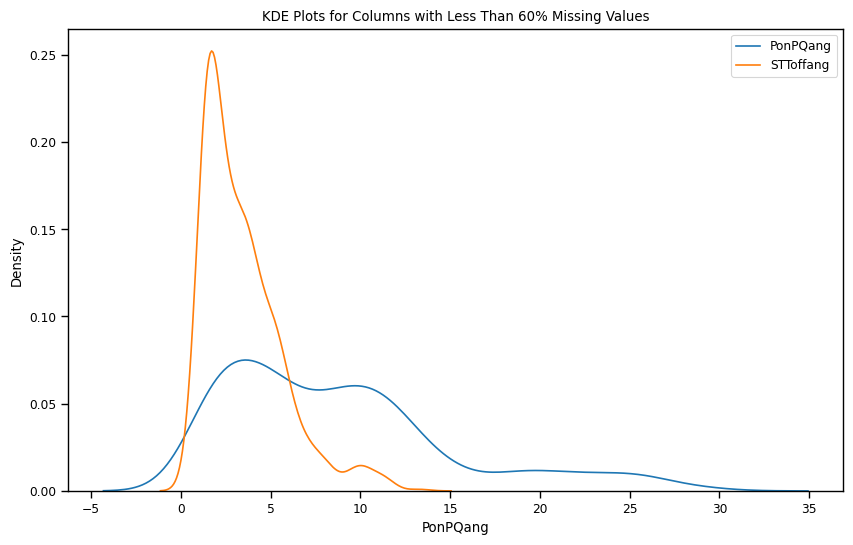

In [271]:
# explore the distribution of the columns
plt.figure(figsize=(10, 6))
for column in less_than_60.index:
    sns.kdeplot(df[column], label=column)
plt.title('KDE Plots for Columns with Less Than 60% Missing Values')
plt.legend()
plt.show()
#plot the KDE plots for columns

In [272]:
# After seeing the skewness of the data, and the kde plots, we could observe that the data is not normally distributed
# We will use the median to fill in the missing values
# We will fill the missinge values by the median of each sup-group of the data based on ECG_signal
sup_groups_0 = df.groupby('ECG_signal')[less_than_60.index[0]].median().to_dict()
sup_groups_1 = df.groupby('ECG_signal')[less_than_60.index[1]].median().to_dict()
# Mapping the missing values
df[less_than_60.index[0]] = df[less_than_60.index[0]].fillna(df['ECG_signal'].map(sup_groups_0))
df[less_than_60.index[1]] = df[less_than_60.index[1]].fillna(df['ECG_signal'].map(sup_groups_1))

## Duplicate Rows Analysis

In [273]:
# Duplicate check
duplicated_rows = df.duplicated().sum()
print(f"Duplicated rows: {duplicated_rows}")

Duplicated rows: 2


## Analyze The Distribution Of Features And Class Labels.  


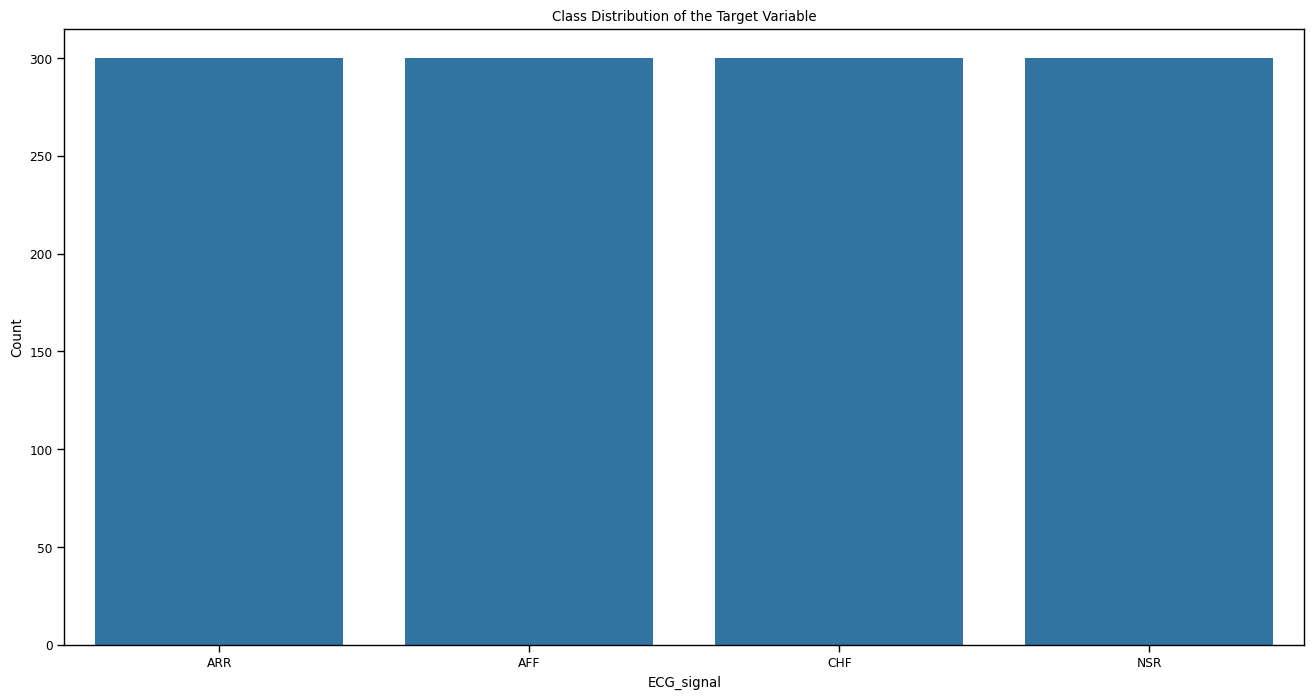

In [274]:
# check for the class distribution for the target variable
plt.figure(figsize=(16, 8))
sns.countplot(x=df['ECG_signal'])
plt.title('Class Distribution of the Target Variable')
plt.xlabel('ECG_signal')
plt.ylabel('Count')
plt.show()
# from the plot we can see that the data is balanced as the classes are equal

## Feature Selection & Engineering 
**why its important to do features selecting**
- Faster to train.
- Simplify the model → A simple model is the best model.
- Removes irrelevant/noisy data → Improves model accuracy.
- Reduces dimensionality → Prevents overfitting and speeds up training.
- Enhances interpretability → Helps understand which features impact predictions

### **🔍 Feature Selection Using Swarm Plots**
 **🎯 Introduction**
Feature selection is a crucial step in building an effective **machine learning model**. By identifying **redundant, noisy, or low-variance features**, we can improve model performance and interpretability while reducing overfitting. In this analysis, we will use **Swarm Plots** to visually inspect the distribution of ECG features across different cardiac ailments and make informed decisions about feature selection.

---

### **📌 Why Use Swarm Plots for Feature Selection?**
Swarm plots are powerful for **visualizing feature distributions** because they show:
- **Feature overlap** → Helps determine whether features clearly separate different classes or mix significantly.
- **High-noise features** → Identifies features with excessive spread or outliers that may reduce model performance.
- **Low-variance features** → Highlights features with minimal variation across classes, which may contribute little useful information.

By analyzing the swarm plots, we can:
- **Remove irrelevant features** that do not contribute to class differentiation.  
- **Filter out high-noise features** that could introduce inconsistencies.  
- **Eliminate low-variance features** that do not provide meaningful distinctions between classes.


**Important note the code that run sworm plot take a long time dont run it**

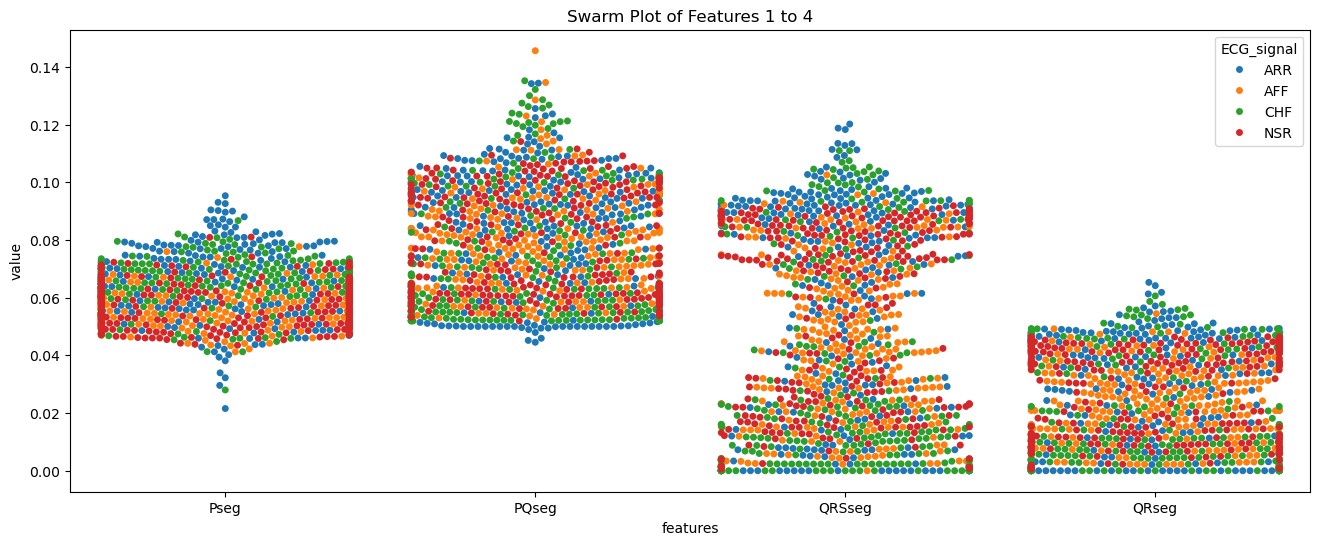

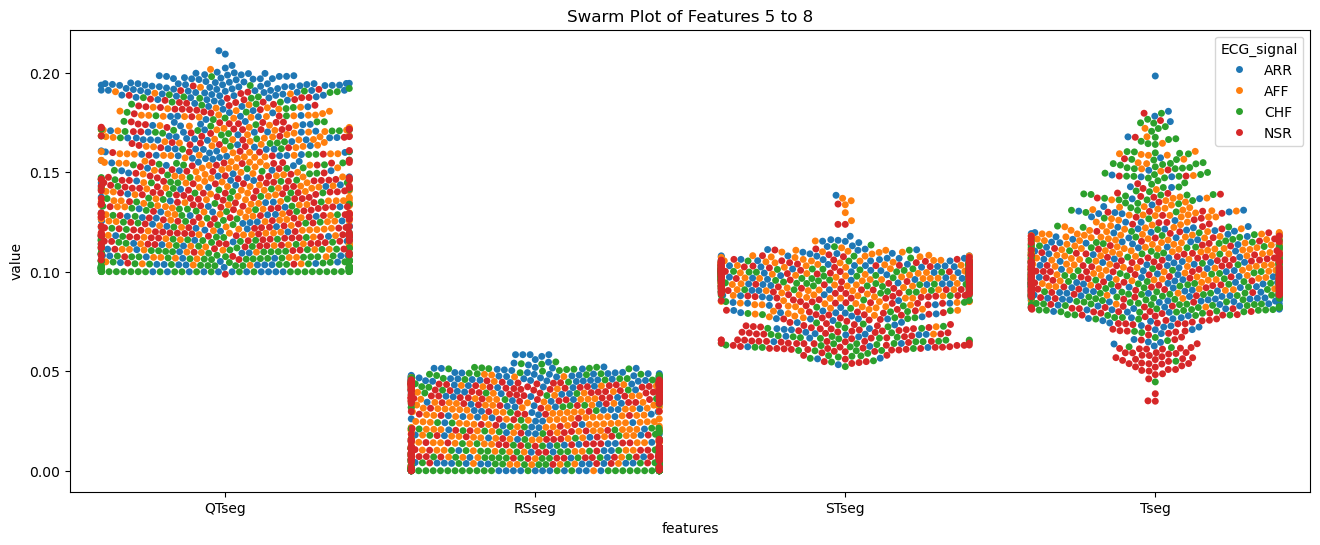

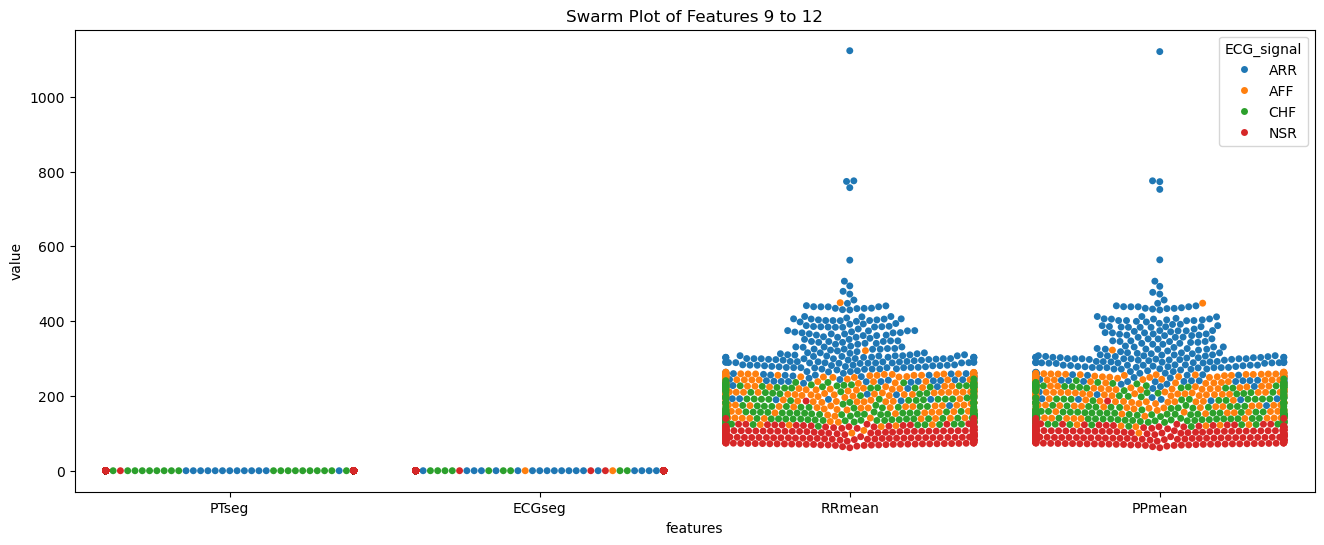

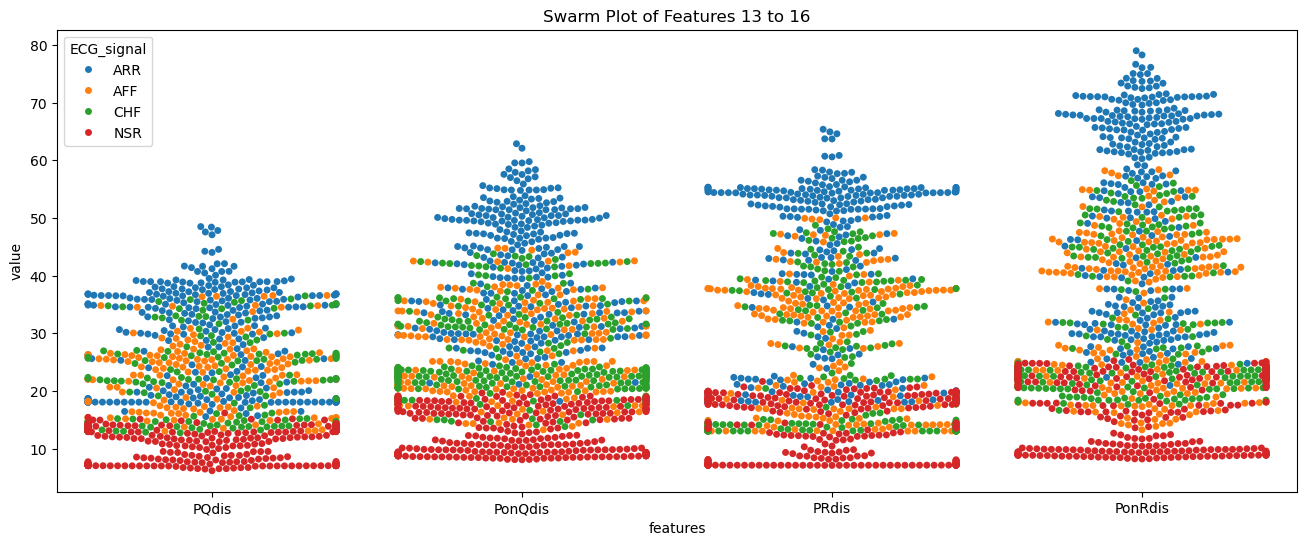

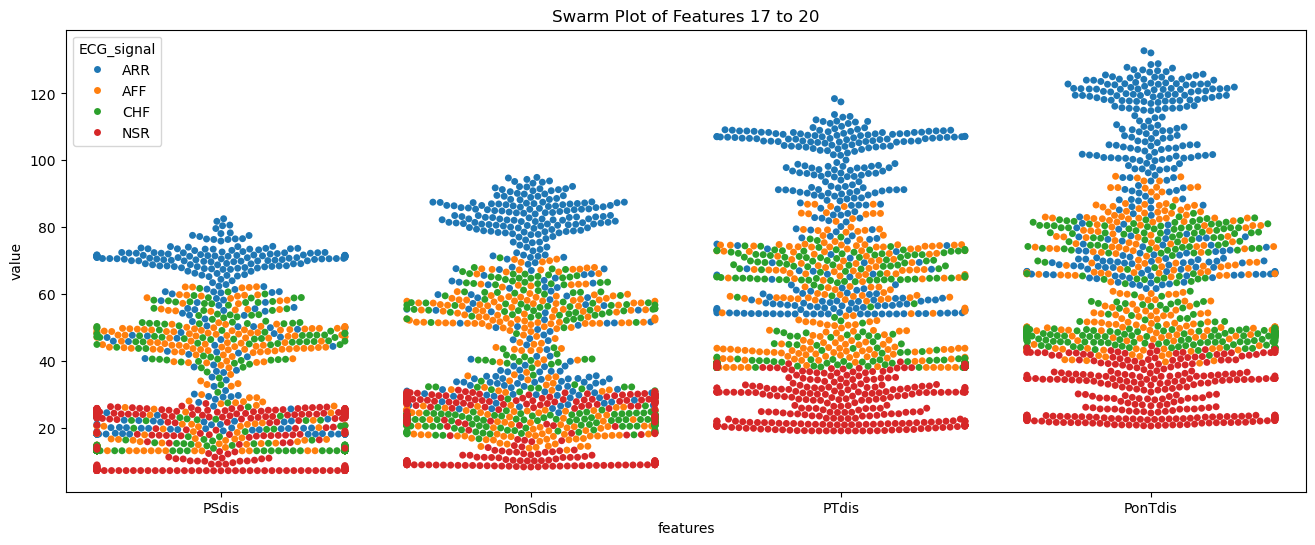

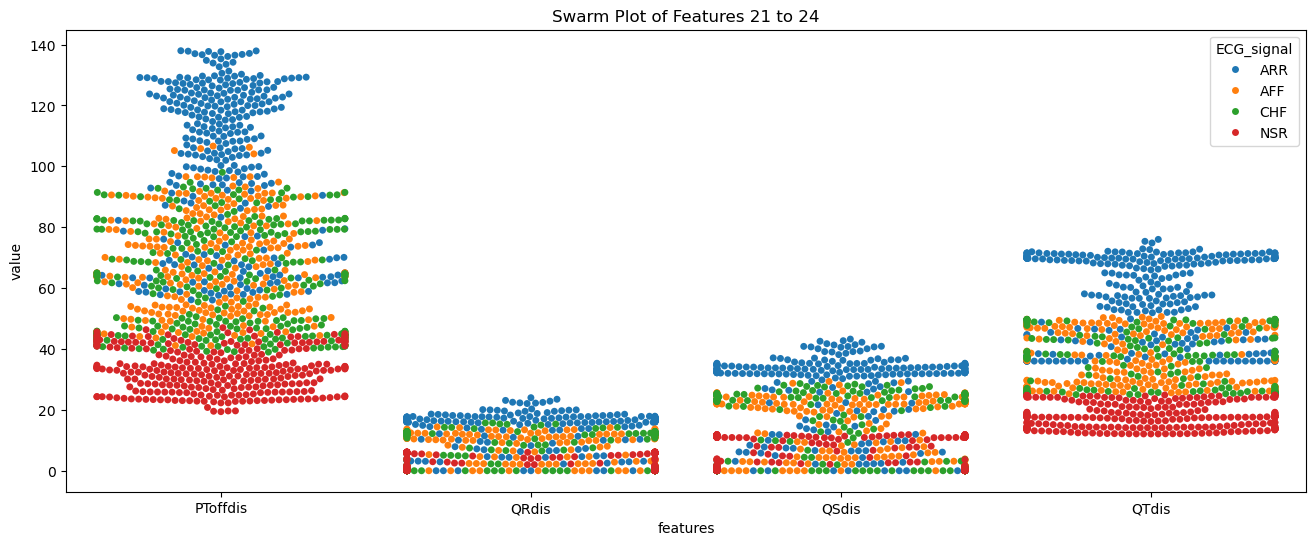

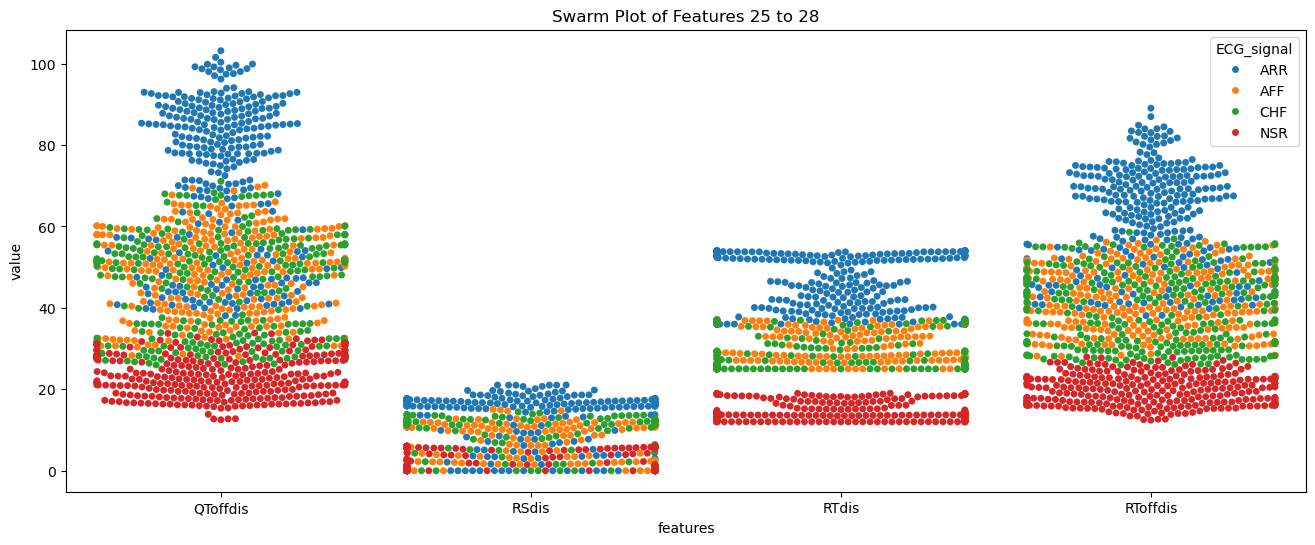

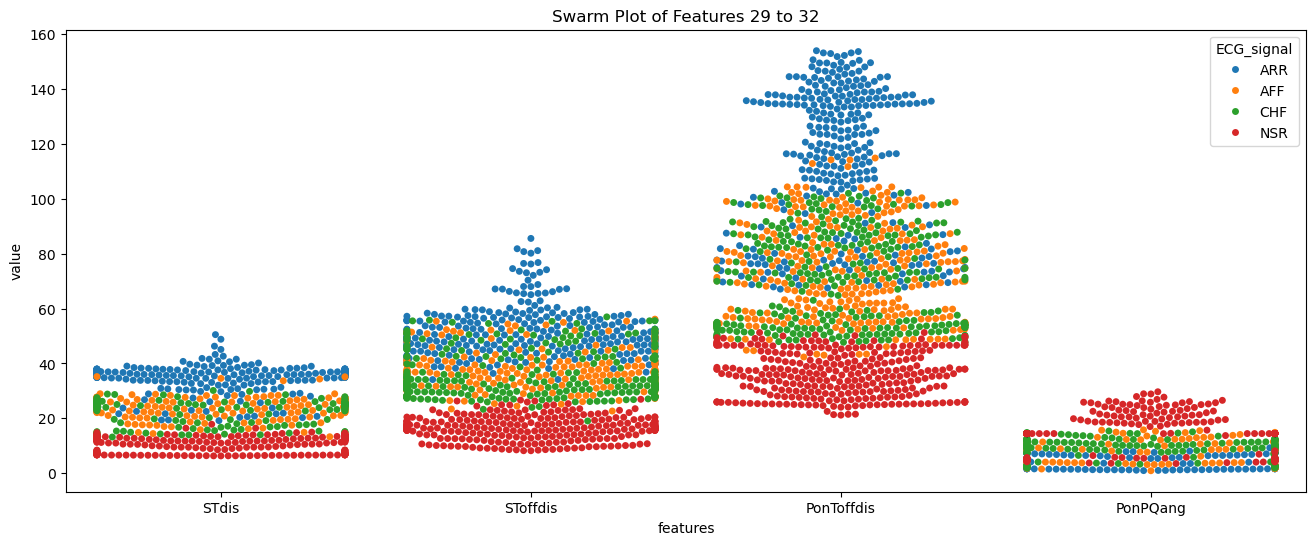

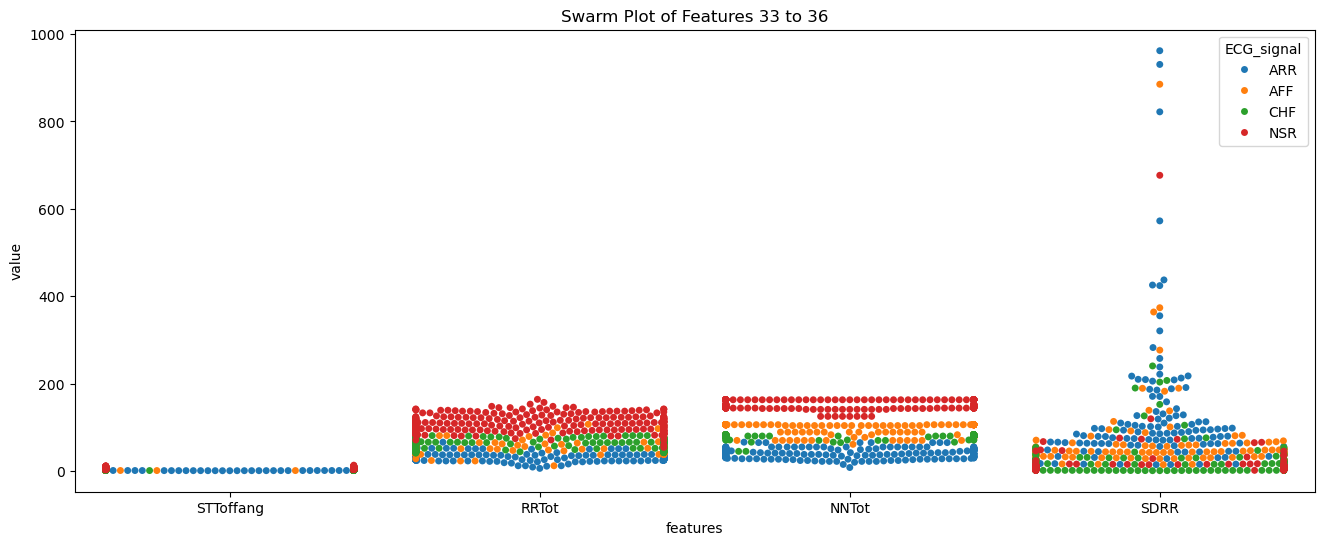

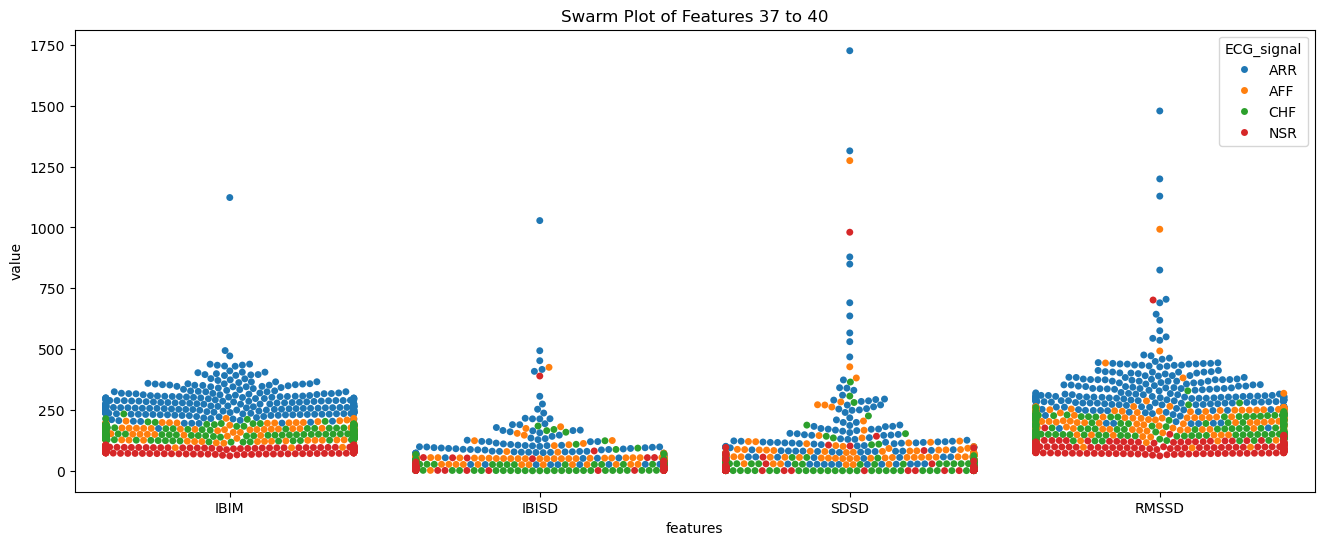

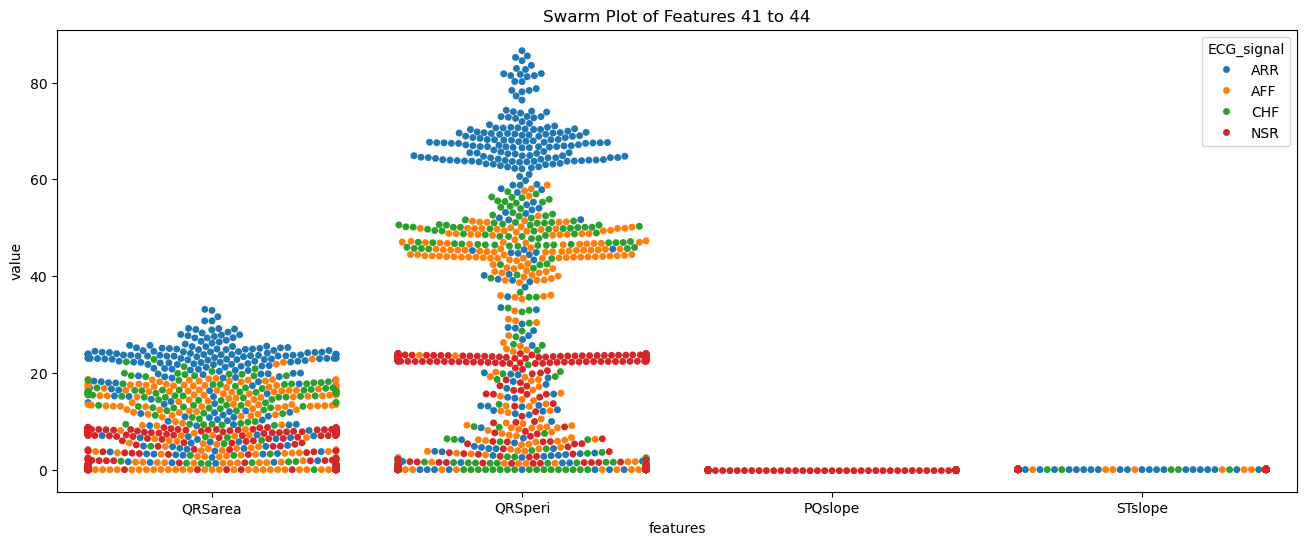

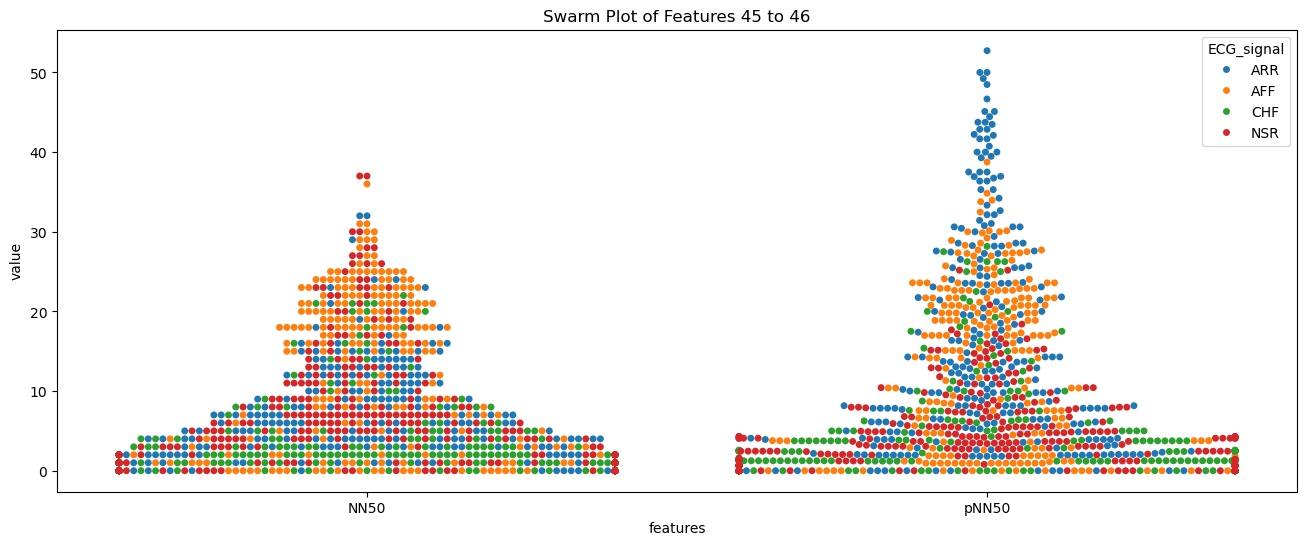

In [ ]:
# Get total number of columns excluding the last one (class column)
'''
num_features = df.shape[1] - 1  
# Loop through every 4 columns
for i in range(1, num_features, 4):  
    # Ensure we don't exceed available columns
    selected_cols = list(range(i, min(i + 4, num_features))) + [-1]  

    # Melt the selected columns
    df_melted = pd.melt(df.iloc[:, selected_cols], id_vars='ECG_signal', 
    var_name='features', value_name='value')

    # Plot
    plt.figure(figsize=(16, 6))
    sns.swarmplot(x='features', y='value', hue='ECG_signal', data=df_melted, legend=True)
    plt.title(f'Swarm Plot of Features {i} to {min(i + 3, num_features - 1)}')
    plt.legend(title='ECG_signal')
    plt.show()

'''
# dont run this cell if you are using a low memory & cpu system

### **Feature Analysis**
Using **swarm plots**, we will systematically explore each feature extracted from ECG signals to determine which features should be **retained** and which should be **removed or transformed** before building our machine learning model.

After observing all features we colud breif the features with low varience and high noise by the following features

In [205]:
Low_variance = df[['PTseg','ECGseg','STslope','PQslope',]]
Low_variance.describe()


PTseg       ECGseg      STslope      PQslope
count  1200.000000  1200.000000  1200.000000  1200.000000
mean      0.219640     0.297161     0.041659    -0.071647
std       0.046359     0.054820     0.026456     0.049705
min       0.150000     0.189943     0.008183    -0.219938
25%       0.177343     0.252667     0.023853    -0.106660
50%       0.215223     0.294843     0.034460    -0.058518
75%       0.260269     0.341086     0.049778    -0.027685
max       0.347324     0.456507     0.164633    -0.005427

In [206]:
high_noise = df[['QRSseg','QRseg','SDRR','SDSD','NN50','pNN50']]
high_noise.describe()

QRSseg        QRseg         SDRR         SDSD         NN50  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.048238     0.024437    31.147005    42.484060     6.442500   
std       0.034649     0.017501    72.670625   105.722123     7.748445   
min       0.000000     0.000000     0.779323     0.800624     0.000000   
25%       0.015101     0.007804     5.005466     4.060951     1.000000   
50%       0.044692     0.022676    10.554162    11.265829     3.000000   
75%       0.083032     0.041915    33.016125    44.785825    10.000000   
max       0.120160     0.065278   961.810719  1725.927603    37.000000   

             pNN50  
count  1200.000000  
mean      8.112425  
std      10.325033  
min       0.000000  
25%       0.613497  
50%       3.680982  
75%      12.883436  
max      52.727273

### Machine Learning-Based Feature Selection
**Feature Importance using Random Forest**

In [207]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df.iloc[:,:-1], df.iloc[:, -1])

RandomForestClassifier(random_state=42)

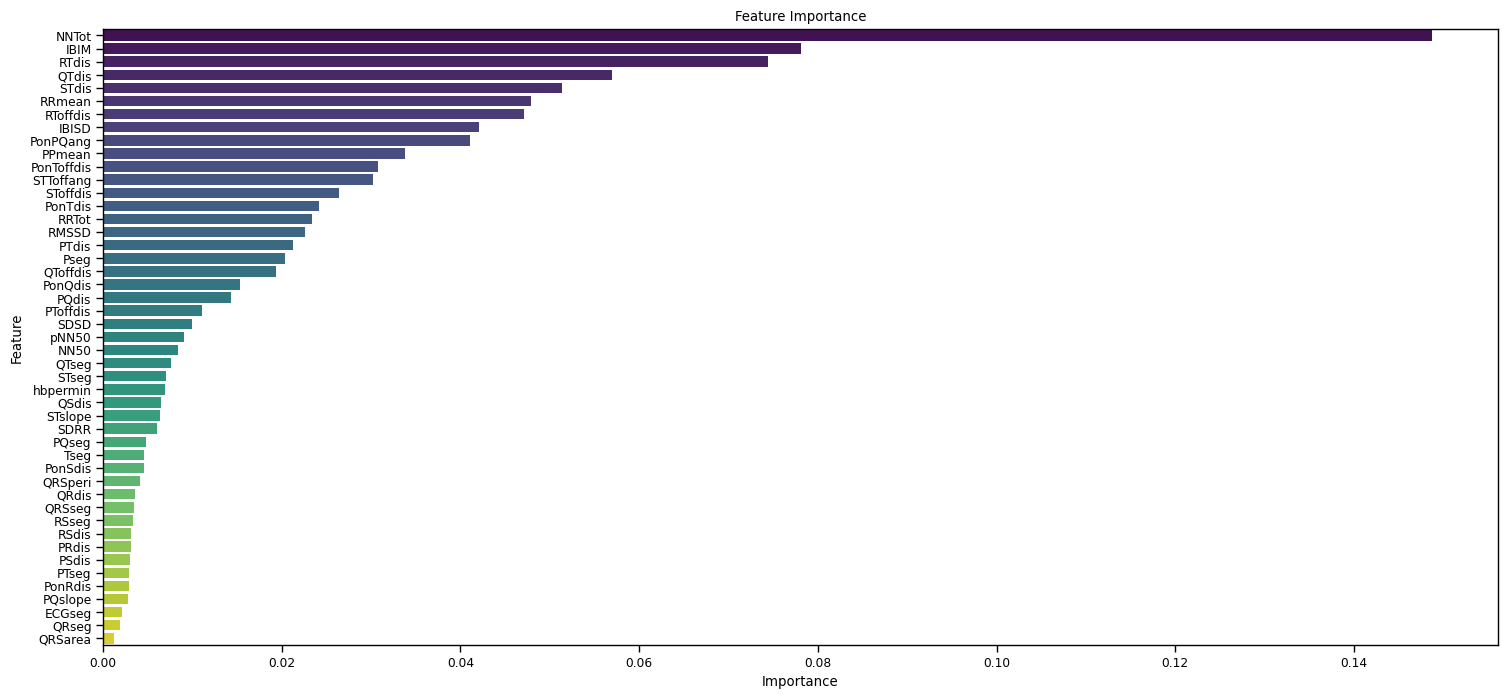

In [208]:
feature_importance = pd.Series(model.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(18, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
sns.set_context('paper')

In [209]:
# assume 0.02 as the threshold for feature importance
high_importance = feature_importance[feature_importance>=0.02]
high_importance.count()

18

After observing the feature inportance lets check the columns we assumed that has a high noise and low varience is in the important features or not 

In [210]:
Low_variance.isin(high_importance.index)

PTseg  ECGseg  STslope  PQslope
0     False   False    False    False
1     False   False    False    False
2     False   False    False    False
3     False   False    False    False
4     False   False    False    False
...     ...     ...      ...      ...
1195  False   False    False    False
1196  False   False    False    False
1197  False   False    False    False
1198  False   False    False    False
1199  False   False    False    False

[1200 rows x 4 columns]

In [211]:
high_noise.isin(high_importance.index)

QRSseg  QRseg   SDRR   SDSD   NN50  pNN50
0      False  False  False  False  False  False
1      False  False  False  False  False  False
2      False  False  False  False  False  False
3      False  False  False  False  False  False
4      False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...
1195   False  False  False  False  False  False
1196   False  False  False  False  False  False
1197   False  False  False  False  False  False
1198   False  False  False  False  False  False
1199   False  False  False  False  False  False

[1200 rows x 6 columns]

After check the machine learning model we colud prove that our assumption is ture.

In [212]:
features = df[high_importance.index]
features.describe()

NNTot         IBIM        RTdis        QTdis        STdis  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     93.631667   170.449672    29.119793    35.141710    23.236050   
std      40.922445    81.436943    12.001314    16.809520     9.214801   
min       8.000000    61.656442    12.010695    12.083644     6.332043   
25%      65.000000   104.691433    23.506483    24.978347    13.851301   
50%      83.000000   153.561366    26.149959    28.802629    25.014005   
75%     110.750000   197.636716    36.568100    46.556688    27.500495   
max     163.000000  1122.875000    54.006212    75.992131    50.505006   

            RRmean     RToffdis        IBISD     PonPQang       PPmean  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean    192.595169    40.930180    33.894745     8.708289   192.578370   
std      95.049250    17.326939    53.006449     5.517924    94.996388   
min      61.656442    12.419161     0.784061     0.933950    61.656442   
25%     121.067073    26.651322     9.286926     3.377234   121.112805   
50%     179.518182    40.411834    21.573420     8.913288   179.597811   
75%     242.769817    51.124908    41.111167    11.586613   242.037500   
max    1122.875000    89.045542  1028.218909    29.688424  1120.500000   

        PonToffdis    STToffang     SToffdis      PonTdis       RRTot  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.00000   
mean     73.667401     3.521076    35.040815    61.854528    64.24000   
std      33.028948     1.946855    14.391242    28.449516    30.58794   
min      21.184394     0.626623     8.214361    20.469708     6.00000   
25%      48.320412     1.859184    24.954654    42.504173    41.00000   
50%      70.123067     3.405368    33.892540    51.009937    55.00000   
75%      94.583795     4.930740    46.188107    79.368455    83.00000   
max     153.911765    13.298720    85.545018   132.782659   164.00000   

             RMSSD        PTdis         Pseg  
count  1200.000000  1200.000000  1200.000000  
mean    199.417894    54.296841     0.060902  
std     112.292014    25.637439     0.009453  
min      61.711281    19.007673     0.021556  
25%     123.147741    38.003825     0.053943  
50%     183.603851    43.734389     0.060642  
75%     248.101035    70.973844     0.066849  
max    1478.488460   118.454548     0.095317

### Identify correlations between features

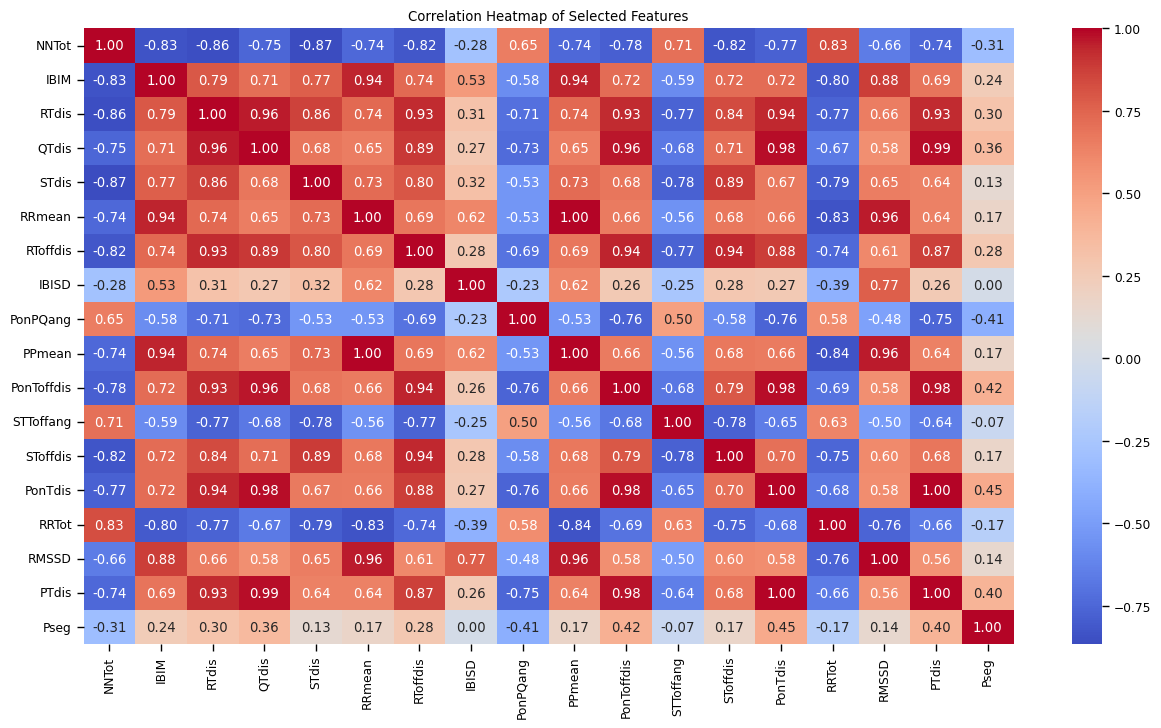

In [213]:
# corrleation heat map of the features
plt.figure(figsize=(15,8))
sns.heatmap(features.corr(),annot=True,cmap='coolwarm',fmt='.2f',)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

AFter observing the heat map there is features that has high corr with many features like PTdis --> has high correlation with four features 


In [214]:
# revers the order of features columns
features = features[features.columns[::-1]]

In [215]:
# Identify redundant features (correlation >= 0.9)
redundant_features = []
correlation_matrix = features.corr()
for col in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if col != index and correlation_matrix.loc[col, index] >= 0.9:
            redundant_features.append(index)
# Keep only unique redundant features
redundant_features = list(set(redundant_features))
print(redundant_features)


['RTdis', 'SToffdis', 'RMSSD', 'IBIM', 'PonToffdis', 'QTdis', 'RRmean', 'PTdis', 'RToffdis', 'PPmean', 'PonTdis']


In [216]:
# reored the features columns
features = features[features.columns[::-1]]

### Remove Redundant Features

In [217]:
features = features.drop(columns=redundant_features)
features.describe()

NNTot        STdis        IBISD     PonPQang    STToffang  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     93.631667    23.236050    33.894745     8.708289     3.521076   
std      40.922445     9.214801    53.006449     5.517924     1.946855   
min       8.000000     6.332043     0.784061     0.933950     0.626623   
25%      65.000000    13.851301     9.286926     3.377234     1.859184   
50%      83.000000    25.014005    21.573420     8.913288     3.405368   
75%     110.750000    27.500495    41.111167    11.586613     4.930740   
max     163.000000    50.505006  1028.218909    29.688424    13.298720   

            RRTot         Pseg  
count  1200.00000  1200.000000  
mean     64.24000     0.060902  
std      30.58794     0.009453  
min       6.00000     0.021556  
25%      41.00000     0.053943  
50%      55.00000     0.060642  
75%      83.00000     0.066849  
max     164.00000     0.095317

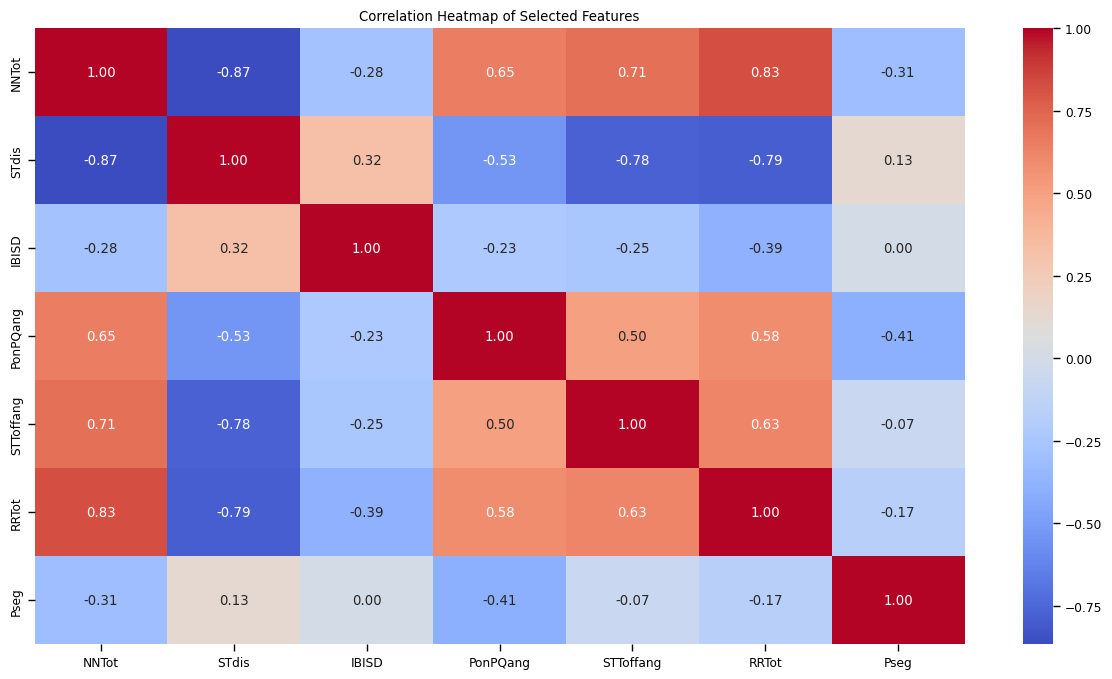

In [190]:
# corrleation heat map of the features
plt.figure(figsize=(15,8))
sns.heatmap(features.corr(),annot=True,cmap='coolwarm',fmt='.2f',)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [192]:
features.columns

Index(['NNTot', 'STdis', 'IBISD', 'PonPQang', 'STToffang', 'RRTot', 'Pseg'], dtype='object')

In [219]:
final_data = pd.concat([features, df['ECG_signal']], axis=1)
final_data.tail(5)

NNTot      STdis      IBISD   PonPQang  STToffang  RRTot      Pseg  \
1195    163  13.604285   5.009289  21.328827   5.390048    119  0.051353   
1196    163   6.826239  18.528265   8.188221   7.121384     80  0.057355   
1197    163  11.451169   8.120195   5.403345   5.037948    122  0.058927   
1198    163   6.443333  15.473730   4.611690   7.221305     83  0.061500   
1199    163  12.530919  11.850967   4.751589   4.070685     92  0.063072   

     ECG_signal  
1195        NSR  
1196        NSR  
1197        NSR  
1198        NSR  
1199        NSR

In [227]:
# Create a data frame from the final data containing only four rows as examples, one for each class
df_example = final_data.groupby('ECG_signal').first().reset_index()
df_example = df_example.drop(columns=['ECG_signal'])
df_example = df_example.T
df_example.columns = ['ARR', 'AFF', 'CHF', 'NSR']
df_example = df_example.reset_index()
df_example.columns = ['Features', 'ARR', 'AFF', 'CHF', 'NSR']
df_example = df_example.melt(id_vars='Features', var_name='ECG_signal', value_name='Value')

# Adjust the scale for the 'Pseg' column to make it more visible
df_example.loc[df_example['Features'] == 'Pseg', 'Value'] *= 1000

# Plot the example data using Plotly Express
# Adjust the scale for the 'Pseg' and 'PonPQang' columns for better visibility
# # Add annotations for scaling
df_example.loc[df_example['Features'] == 'Pseg', 'Features'] = 'Pseg (scaled by 1000)'

# Plot the example data using Plotly Express
fig = px.bar(
    df_example,
    x='Features',
    y='Value',
    color='ECG_signal',
    barmode='group',
    title='Example Data for Each Class',
    labels={'Value': 'Value', 'Features': 'Features', 'ECG_signal': 'ECG Signal'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Value',
    legend_title='ECG Signal',
    xaxis_tickangle=45
)
fig.show()


# Building Tree-Based Classification Models

Before proceeding with feature normalization and scaling, it is important to note that tree-based classification models do not require these preprocessing steps. Unlike linear models or distance-based algorithms (such as KNN or SVM), tree-based models are scale-invariant and are not affected by the magnitude of feature values.

### Data Preprocessing

In [161]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
df['ECG_signal'] = encoder.fit_transform(df['ECG_signal'])

In [162]:
# Mapping the classes to their respective numbers
category_to_number = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(category_to_number)

{'AFF': 0, 'ARR': 1, 'CHF': 2, 'NSR': 3}


In [163]:
# split the data tot traning and testing
from sklearn.model_selection import train_test_split
x = features
y = df['ECG_signal']

In [164]:
# split the data to traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Building The Models


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score ,KFold 


In [174]:
# Define the classifiers
clf_random = RandomForestClassifier(n_estimators=100, random_state=42)
clf_decision = DecisionTreeClassifier(random_state=42)
clf_gradient = GradientBoostingClassifier(random_state=42)
clf_extra = ExtraTreesClassifier(random_state=42)
# Train the classifiers
clf_random.fit(x_train, y_train)
clf_decision.fit(x_train, y_train)
clf_gradient.fit(x_train, y_train)
clf_extra.fit(x_train, y_train)
# Make predictions
y_pred_random = clf_random.predict(x_test)
y_pred_decision = clf_decision.predict(x_test)
y_pred_gradient = clf_gradient.predict(x_test)
y_pred_extra = clf_extra.predict(x_test)

In [175]:
# Create a summary DataFrame
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Extra Trees']
y_preds = [y_pred_random, y_pred_decision, y_pred_gradient, y_pred_extra]
models_summary = []
# ------------------------------------------------------------------------------------------------------------
for name, y_pred in zip(model_names, y_preds):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    models_summary.append([name, acc, prec, rec, f1])
# ------------------------------------------------------------------------------------------------------------
df_summary = pd.DataFrame(models_summary, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_summary = df_summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


# Display summary table
print("Model Performance Summary:\n")
print(df_summary)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
df_melted = df_summary.melt(id_vars='Model', var_name='Metric', value_name='Score') # Melt the DataFrame for plotting


#Plot performance comparison
fig = px.bar(
df_melted, 
x='Model', 
y='Score', 
color='Metric',
barmode='group',
title="Tree-Based Model Performance Comparison",
color_discrete_sequence=px.colors.qualitative.Vivid,
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_range=[0.8, 1])
fig.show()

Model Performance Summary:

               Model  Accuracy  Precision    Recall  F1 Score
0        Extra Trees  0.983333   0.984375  0.983333  0.983315
1      Random Forest  0.970833   0.971387  0.970833  0.970815
2  Gradient Boosting  0.970833   0.971387  0.970833  0.970815
3      Decision Tree  0.937500   0.938115  0.937769  0.937911


## ✅ Final Model Selection: Extra Trees Classifier

After evaluating multiple tree-based classification models — including Random Forest, Decision Tree, and Gradient Boosting — we selected the **Extra Trees Classifier** as the final model for predicting cardiac ailments.

### 🔍 Why Extra Trees?
- **Highest Accuracy**: Achieved **98.3% accuracy** on the test set.
- **Strong Overall Performance**: Excellent precision, recall, and F1-score across all classes.
- **Robustness**: Consistently outperformed other models without overfitting.
- **Efficiency**: Fast training and reliable generalization.

This makes Extra Trees the most reliable and effective model for our ECG classification task.


## Cross Validation For Reliability and Generalization


In [176]:
from sklearn.model_selection import cross_val_score, KFold

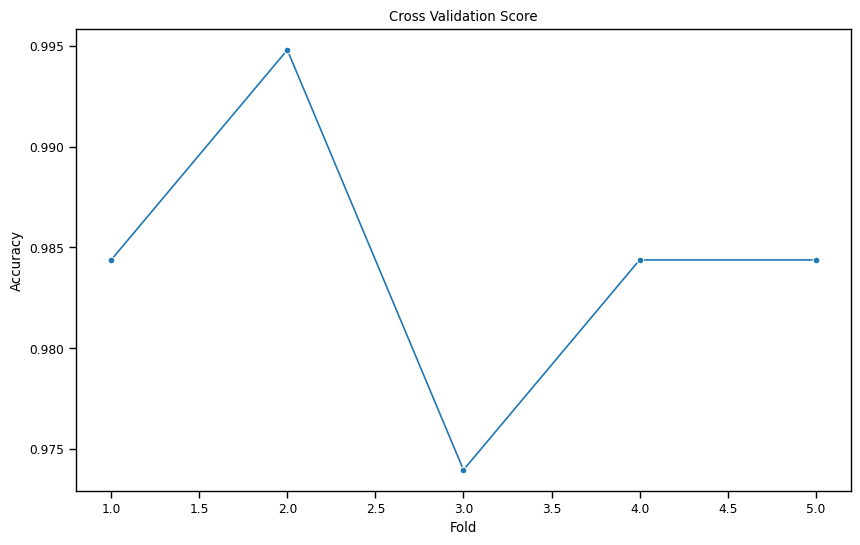

Cross Validation Scores: ['0.98', '0.99', '0.97', '0.98', '0.98']
Mean Cross Validation Score: 0.98
Standard Deviation of Cross Validation Score: 0.0066


In [180]:
fold = KFold(n_splits = 5 , shuffle=True , random_state=42)
cv = cross_val_score(clf_extra,x_train,y_train,cv=fold)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cv) + 1), y=cv, marker='o')
plt.title('Cross Validation Score')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()
print('Cross Validation Scores:', ['{:.2f}'.format(score) for score in cv])
print ( 'Mean Cross Validation Score:', cv.mean().round(2))
print ( 'Standard Deviation of Cross Validation Score:', cv.std().round(4))


These results indicate that our model is **highly accurate** and **stable**, with very low variance between folds. This consistency strengthens our confidence in the model's performance on unseen ECG data.

## Model Export

In [181]:
import pickle
# Save the model to disk
filename = 'ecg_model.pkl'
pickle.dump(clf_extra, open(filename, 'wb'))